In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_openml
from sklearn.utils.extmath import softmax
import matplotlib.pyplot as plt
from matplotlib import pyplot
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from mpl_toolkits.axes_grid1 import make_axes_locatable

from src.supervised_NDL.SMF_BCD import SDL_BCD
from src.supervised_NDL.SMF_torch import smf

/Users/yee/Research/REU_2024/REU2024_code/src/supervised_NDL/SMF_BCD.py:143: SyntaxWarning: invalid escape sequence '\h'
  '''
/Users/yee/Research/REU_2024/REU2024_code/src/supervised_NDL/SMF_BCD.py:197: SyntaxWarning: invalid escape sequence '\h'
  '''
/Users/yee/Research/REU_2024/REU2024_code/src/supervised_NDL/SMF_BCD.py:266: SyntaxWarning: invalid escape sequence '\h'
  '''
/Users/yee/Research/REU_2024/REU2024_code/src/supervised_NDL/SMF_BCD.py:334: SyntaxWarning: invalid escape sequence '\h'
  '''
/Users/yee/Research/REU_2024/REU2024_code/src/supervised_NDL/SMF_BCD.py:1010: SyntaxWarning: invalid escape sequence '\h'
  '''
/Users/yee/Research/REU_2024/REU2024_code/src/supervised_NDL/SMF_BCD.py:1139: SyntaxWarning: invalid escape sequence '\h'
  '''
/Users/yee/Research/REU_2024/REU2024_code/src/supervised_NDL/SMF_BCD.py:1193: SyntaxWarning: invalid escape sequence '\s'
  """
/Users/yee/Research/REU_2024/REU2024_code/src/supervised_NDL/SMF_BCD.py:1259: SyntaxWarning: invalid escape 

In [2]:
# Load data from https://www.openml.org/d/554
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)
# X = X.values  ### Uncomment this line if you are having type errors in plotting. It is loading as a pandas dataframe, but our indexing is for numpy array. 
X = X / 255.

print('X.shape', X.shape)
print('y.shape', y.shape)

'''
Each row of X is a vectroization of an image of 28 x 28 = 784 pixels.  
The corresponding row of y holds the true class label from {0,1, .. , 9}.
'''

X.shape (70000, 784)
y.shape (70000,)


'\nEach row of X is a vectroization of an image of 28 x 28 = 784 pixels.  \nThe corresponding row of y holds the true class label from {0,1, .. , 9}.\n'

In [3]:
### Change the dimension of y for SMF_BCD
y_matrix = np.zeros((9, y.shape[0]))
for i in range(y.shape[0]):
    label = int(y[i])
    if label == 0:
        continue
    else:
        y_matrix[label-1, i] = 1

print(y_matrix.shape)

### Scale the input data
from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(X)

X= scaler.transform(X)

print(X.shape)

(9, 70000)
(70000, 784)


In [4]:
n_components = 16

SMF_Train = SDL_BCD([X.T, y_matrix], X_test=[X.T, y_matrix], xi= 5, n_components=n_components)

results_dict = SMF_Train.fit(iter=100, subsample_size=None,# search_radius_const=200*np.linalg.norm(X),
                                if_compute_recons_error=False, if_validate=False, threshold=0.5)

initial loading beta [[-7.49548513e-02  3.18791458e-01 -3.19289656e-02 -1.58762679e-01
  -6.11793868e-01 -8.77981781e-01  4.44238039e-01  9.27414125e-01
  -8.53613671e-02 -8.73822170e-02 -2.74024410e-01 -5.57165858e-02
  -8.75286927e-01 -6.53828555e-01 -2.99476469e-01 -1.09445848e-01
  -8.79812182e-01]
 [-4.01314165e-01 -9.54347052e-01 -2.65712497e-03  1.72792656e-02
   1.51075776e-02  2.56535416e-02 -2.95653333e-01 -4.40282330e-01
  -6.86870078e-01  1.07153474e-01  2.95687920e-01 -6.76590298e-01
   8.85686186e-01  1.26971152e-01  1.91543261e-01  3.08943718e-01
  -8.08666613e-01]
 [-3.66066244e-01  6.37199578e-01  2.36614070e-01  7.53968416e-01
  -3.67679740e-01  4.41789923e-01  9.04882852e-01 -9.16623528e-01
  -9.06420827e-01 -9.68384855e-01 -6.53595001e-01  4.60547238e-01
   3.24159215e-01  8.71804241e-01  5.27359471e-01 -9.13472138e-01
  -5.44108401e-01]
 [-8.36688143e-02  2.39862109e-01 -8.83935083e-02 -8.80803316e-01
   9.48794662e-01  9.87260955e-01  5.59265166e-01  9.74127245e-0

100%|██████████| 100/100 [07:16<00:00,  4.36s/it]
/Users/yee/miniforge3/envs/REU2024/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


!!! pred_type filter
!!! FINAL [confusion_mx, Accuracy] =  [array([[559778,   7125],
       [ 15255,  47842]]), 0.964]


In [5]:
W = results_dict.get('loading')[0]
beta= results_dict.get('loading')[1]
H = results_dict.get('code')

In [6]:
n = np.random.randint(0, 70000, size=100)
X_test = np.ones((X.shape[1], 100))
y_test = np.ones(shape=100)
for i in range(100):
    X_test[:, i] = X.T[:, n[i]]
    y_test[i] = y[n[i]]

p = np.zeros((100, 9))
for i in range(100):
    normalizer = 1 + np.sum(np.exp(beta[:, 1:] @ W.T @ X_test[:, i] + beta[:, 0]))
    p[i] = (np.exp(beta[:, 1:] @ W.T @ X_test[:, i] + beta[:, 0]) / normalizer).T


acc = 0
for j in range(100):
    prob = np.max(p[j])
    number = np.argmax(p[j]) + 1
    if (1 - np.sum(p[j])) > prob:
        number = 0
    if y_test[j] == number:
        acc += 1

print(f"The accuracy rate: {acc/100}")


The accuracy rate: 0.88


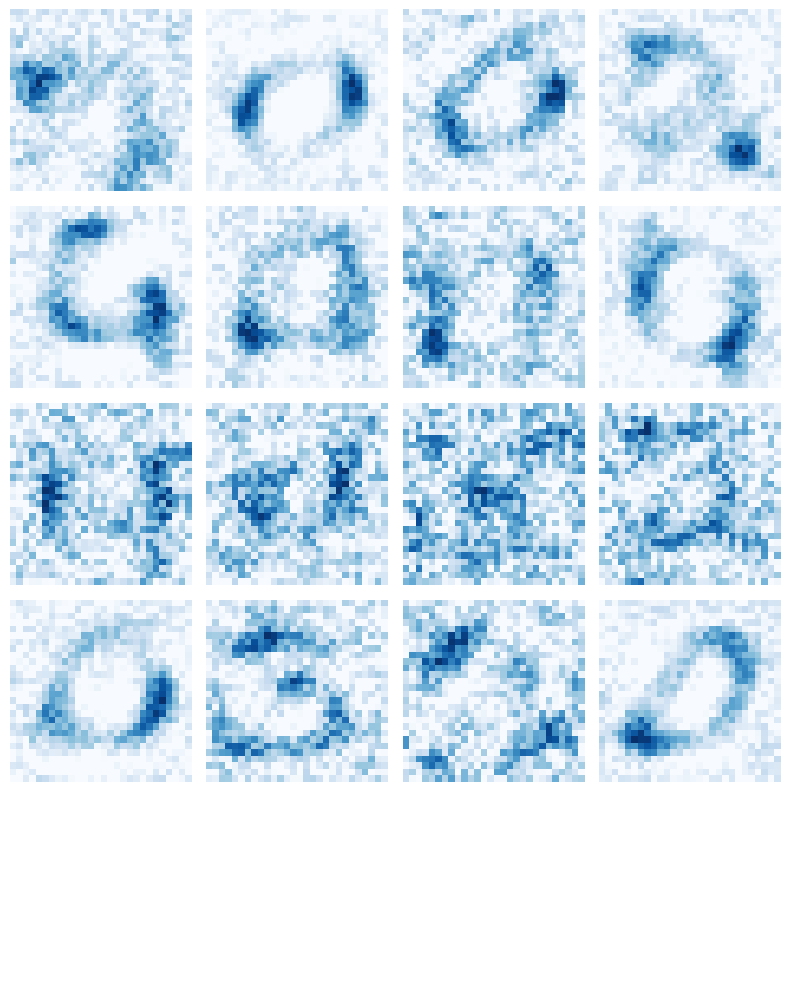

In [7]:
image = np.zeros((n_components, 28, 28))
for i in range(n_components):
    image[i] = W[:, i].reshape(28,28)

images_per_row = 4
n_rows = len(image) // images_per_row + 1

# Create a figure with subplots
fig, axes = plt.subplots(nrows=n_rows, ncols=images_per_row, figsize=(images_per_row * 2, n_rows * 2))

for i, ax in enumerate(axes.flat):
    if i < n_components:
        # Reshape and display each component as an image
        ax.imshow(image[i], cmap='Blues')  # Use gray scale color map
        ax.axis('off')  # Hide axes
    else:
        ax.axis('off')  # Hide axes for empty subplots

# Adjust layout
plt.tight_layout()

# Save the figure
plt.savefig("MINIST")

# Display the plot if needed
plt.show()

In [8]:
print(beta.T[0])

[-7.42388641  0.69534533  0.70059088 -0.70063498  1.32042484 -0.89945879
 -1.21426776  2.0151869  -0.92554544]


# Torch Version

In [9]:
from sklearn.model_selection import train_test_split
import numpy as np
import torch
from torch.autograd import Variable

"""
#data = pd.read_csv('../Data/Pancreatic_GSE16515.csv')
data = pd.read_csv('../Data/Breast_GSE70947.csv')

print(data.shape)
y = data['type'].values
y = [1 if y[i] == 'breast_adenocarcinoma' else 0 for i in range(len(y))]
y = np.array(y)
X = data.drop(columns=['samples', 'type']).values
X = (X - np.mean(X, axis = 0))/(100*np.std(X, axis = 0)) # normalization
"""


hidden_size = 2

Accuracy = []
test_size = 0.5

X_train, X_test, Y_train, Y_test = train_test_split(X, y_matrix.T, test_size=test_size, random_state=2)
# print(X_train.shape)
# print(Y_train.shape)

X_train = Variable(torch.from_numpy(X_train)).float()
y_train = Variable(torch.from_numpy(Y_train)).long()
X_test = Variable(torch.from_numpy(X_test)).float()
y_test = Variable(torch.from_numpy(Y_test)).long()
# print(f"y_train's ndim: {y_train.ndim}")
# print(f"y_test: {y_test.shape}")

smf_model = smf(X_train, y_train, hidden_size, device='cuda')
smf_model.fit(num_epochs=10000,
               lr_classification=0.01,
               lr_matrix_factorization=0.01,
               xi=1,
               initialize='spectral',
               W_nonnegativity=True,
               H_nonnegativity=True,
               test_data=[X_test, y_test],
               record_recons_error=True)
Accuracy.append(smf_model.test_multi(X_test, y_test))

--- Iteration -1: Training loss --- [Data, Label, Total] = [20611333.985233.3, 165929627.435192.3, 186540961.420425.3]
Epoch [10/10000],Loss_Classification: 1.6877 Loss_MF: 0.7805
mythre= 0.5
Test accuracy = 0.9280095238095238, Test confusion_mx = [[279904   3547]
 [ 19130  12419]]
Epoch [20/10000],Loss_Classification: 1.6877 Loss_MF: 0.7784
mythre= 0.5
Test accuracy = 0.9280095238095238, Test confusion_mx = [[279904   3547]
 [ 19130  12419]]
